In [87]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import json
import os

Example entry at a single timestep in the JSON file:

```json
{
  "time": 0.24000000000000007,
  "ee_goal": {
    "x": 0.4,
    "y": -0.75,
    "z": 1.7,
    "roll": 1.518399507018242,
    "pitch": 0.04763160826963666,
    "yaw": 0.737151606155949
  },
  "ee_curr": {
    "x": 0.3226876335743811,
    "y": -0.8667752758924585,
    "z": 1.8885004527912521,
    "roll": 1.9446740867211925,
    "pitch": -0.20834913145559708,
    "yaw": 0.6099857313284582
  },
  "theta_diff": 0.5033419743923844,
  "joint_names": [
    "arm_left_joint1",
    "arm_left_joint2",
    "arm_left_joint3",
    "arm_left_joint4",
    "arm_left_joint5",
    "arm_left_joint6",
    "arm_left_joint7",
    "arm_right_joint1",
    "arm_right_joint2",
    "arm_right_joint3",
    "arm_right_joint4",
    "arm_right_joint5",
    "arm_right_joint6",
    "arm_right_joint7",
    "head_joint1",
    "head_joint2",
    "head_joint3",
    "head_joint4",
    "head_joint5",
    "head_joint6"
  ],
  "joint_positions": [
    -0.0018774319197194817,
    0.0029665779460760397,
    -0.0030017556572236193,
    0.0026050404422611377,
    -0.0017078547959206462,
    -0.004935864105950447,
    0.0003702023077872248,
    0.001695530118309552,
    -0.0005598927900961688,
    0.0037947316263039,
    0.002949965299059122,
    -0.002624134055153545,
    0.001230583004372089,
    0.001353472414172087,
    -0.8481321764990782,
    -0.5672127622365826,
    0.6664251314257632,
    -0.11913720604468482,
    -0.46930429225749815,
    -0.6265403244304898
  ],
  "joint_velocities": [
    0.010221430617089966,
    0.008428131994154129,
    -0.002891116043808841,
    -0.012084601529068961,
    0.008220101548604785,
    0.0005115687351937386,
    0.017113185699888137,
    0.003133834454006,
    -0.003630062079711901,
    0.006455848937763608,
    0.010486735248509425,
    -0.01615966168378254,
    -0.004612113877604457,
    0.0046080188418628045,
    -2.978082760029141,
    -1.5119787082486724,
    1.6379045755008375,
    -0.04106015565376411,
    -1.4273944218676222,
    -2.1839995416317652
  ],
  "joint_efforts": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0
  ],
  "collision_state": false,
  "collision_distance": 0.0
}
```

In [88]:
ROBOT_NAME = "lite6"
IKSOLVER_NAME = "collision_ik"
PATH_NAME  = ""

In [89]:
collisionik_experiments = {}
collisionik_experiments_name = []
for i in [1,2,3,4,5]:
  for experiment_file in glob.glob(ROBOT_NAME+ "/" +  str(i) + "/" + IKSOLVER_NAME + PATH_NAME + "*.json"):
      print("Loading file:", experiment_file)
      clean_filename = os.path.splitext(os.path.basename(experiment_file))[0]
      args_from_filename = clean_filename.split("-")

      entry = {}
      entry["waypoints"] = args_from_filename[0]
      entry["solver"] = args_from_filename[1]

      with open(experiment_file, "r") as f:
        entry["data"] = json.load(f)

      collisionik_experiments[clean_filename + str(i)] = entry
      collisionik_experiments_name.append(clean_filename + str(i))

Loading file: lite6/1/collision_ik-square_xy-.json
Loading file: lite6/1/collision_ik-circle_xy-.json
Loading file: lite6/1/collision_ik-square_yz-.json
Loading file: lite6/1/collision_ik-circle_yz-.json
Loading file: lite6/1/collision_ik-eight_xy-.json
Loading file: lite6/1/collision_ik-eight_yz-.json
Loading file: lite6/2/collision_ik-square_xy-.json
Loading file: lite6/2/collision_ik-circle_xy-.json
Loading file: lite6/2/collision_ik-square_yz-.json
Loading file: lite6/2/collision_ik-circle_yz-.json
Loading file: lite6/2/collision_ik-eight_xy-.json
Loading file: lite6/2/collision_ik-eight_yz-.json
Loading file: lite6/3/collision_ik-square_xy-.json
Loading file: lite6/3/collision_ik-circle_xy-.json
Loading file: lite6/3/collision_ik-square_yz-.json
Loading file: lite6/3/collision_ik-circle_yz-.json
Loading file: lite6/3/collision_ik-eight_xy-.json
Loading file: lite6/3/collision_ik-eight_yz-.json
Loading file: lite6/4/collision_ik-square_xy-.json
Loading file: lite6/4/collision_ik-ci

In [90]:
ROBOT_NAME = "lite6"
IKSOLVER_NAME = "dawn_ik"
dawnik_experiments = {}
dawnik_experiments_name = []
for i in [1,2,3,4,5]:
  print("Filepath: ", ROBOT_NAME+ "/" +  str(i) + "/" + IKSOLVER_NAME + PATH_NAME + "*.json")
  for experiment_file in glob.glob(ROBOT_NAME+ "/" +  str(i) + "/" + IKSOLVER_NAME + PATH_NAME + "*.json"):
      print("Loading file:", experiment_file)
      clean_filename = os.path.splitext(os.path.basename(experiment_file))[0]
      args_from_filename = clean_filename.split("-")

      entry = {}
      entry["waypoints"] = args_from_filename[0]
      entry["solver"] = args_from_filename[1]

      with open(experiment_file, "r") as f:
        entry["data"] = json.load(f)
      #print("Entry name: ", clean_filename + "-" + str(i))
      dawnik_experiments[clean_filename + str(i)] = entry
      dawnik_experiments_name.append(clean_filename + str(i))

Filepath:  lite6/1/dawn_ik*.json
Loading file: lite6/1/dawn_ik-eight_xy-.json
Loading file: lite6/1/dawn_ik-eight_yz-.json
Loading file: lite6/1/dawn_ik-circle_xy-.json
Loading file: lite6/1/dawn_ik-square_xy-.json
Loading file: lite6/1/dawn_ik-circle_yz-.json
Loading file: lite6/1/dawn_ik-square_yz-.json
Filepath:  lite6/2/dawn_ik*.json
Loading file: lite6/2/dawn_ik-eight_xy-.json
Loading file: lite6/2/dawn_ik-eight_yz-.json
Loading file: lite6/2/dawn_ik-circle_xy-.json
Loading file: lite6/2/dawn_ik-square_xy-.json
Loading file: lite6/2/dawn_ik-circle_yz-.json
Loading file: lite6/2/dawn_ik-square_yz-.json
Filepath:  lite6/3/dawn_ik*.json
Loading file: lite6/3/dawn_ik-eight_xy-.json
Loading file: lite6/3/dawn_ik-eight_yz-.json
Loading file: lite6/3/dawn_ik-circle_xy-.json
Loading file: lite6/3/dawn_ik-square_xy-.json
Loading file: lite6/3/dawn_ik-circle_yz-.json
Loading file: lite6/3/dawn_ik-square_yz-.json
Filepath:  lite6/4/dawn_ik*.json
Loading file: lite6/4/dawn_ik-eight_xy-.json
L

In [91]:
def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    arr = np.ma.empty((np.max(lens),len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    return arr.mean(axis = -1), arr.std(axis=-1)

#y, error = tolerant_mean(list_of_ys_diff_len)
#ax.plot(np.arange(len(y))+1, y, color='green')

In [92]:
IKSOLVER_NAME = "dawn_ik"

dawn_joint_positions = []
dawn_joint_velocities = []


dawn_list_pos_x = []
dawn_list_pos_y = []
dawn_list_pos_z = []


dawn_list_roll = []
dawn_list_pitch = []
dawn_list_yaw = []


dawn_list_pos_x_goal = []
dawn_list_pos_y_goal = []
dawn_list_pos_z_goal = []


dawn_list_roll_goal = []
dawn_list_pitch_goal = []
dawn_list_yaw_goal = []


dawn_list_err_x = []
dawn_list_err_y = []
dawn_list_err_z = []


dawn_list_err_roll = []
dawn_list_err_pitch = []
dawn_list_err_yaw = []


dawn_time = []
dawn_list_time = []
dawn_joint_names = None
for experiment_file_name in dawnik_experiments_name:
    #print(experiment_file_name)
    #experiment_file_name = IKSOLVER_NAME  + PATH_NAME + "-" + str(i)
    dawn_pos_x = []
    dawn_pos_y = []
    dawn_pos_z = []

    dawn_pos_x_goal = []
    dawn_pos_y_goal = []
    dawn_pos_z_goal = []

    dawn_roll = []
    dawn_pitch = []
    dawn_yaw = []

    dawn_roll_goal = []
    dawn_pitch_goal = []
    dawn_yaw_goal = []

    dawn_time = []
    for d in dawnik_experiments[experiment_file_name]["data"]:
        dawn_joint_positions.append(d["joint_positions"])
        dawn_joint_positions.append(d["joint_velocities"])
        
        dawn_pos_x.append(d["ee_curr"]["x"])
        dawn_pos_y.append(d["ee_curr"]["y"])
        dawn_pos_z.append(d["ee_curr"]["z"])
        dawn_roll.append(d["ee_curr"]["roll"])
        dawn_pitch.append(d["ee_curr"]["pitch"])
        dawn_yaw.append(d["ee_curr"]["yaw"])

        dawn_pos_x_goal.append(d["ee_goal"]["x"])
        dawn_pos_y_goal.append(d["ee_goal"]["y"])
        dawn_pos_z_goal.append(d["ee_goal"]["z"])    
        dawn_roll_goal.append(d["ee_goal"]["roll"])
        dawn_pitch_goal.append(d["ee_goal"]["pitch"])
        dawn_yaw_goal.append(d["ee_goal"]["yaw"])



        dawn_time.append(d["time"])
        dawn_joint_names = d["joint_names"]

    dawn_pos_x = np.array(dawn_pos_x)
    dawn_pos_y = np.array(dawn_pos_y)
    dawn_pos_z = np.array(dawn_pos_z)
    dawn_roll = np.array(dawn_roll)
    dawn_pitch = np.array(dawn_pitch)
    dawn_yaw = np.array(dawn_yaw)

    dawn_pos_x_goal = np.array(dawn_pos_x_goal)
    dawn_pos_y_goal = np.array(dawn_pos_y_goal)
    dawn_pos_z_goal = np.array(dawn_pos_z_goal)
    dawn_roll_goal = np.array(dawn_roll_goal)
    dawn_pitch_goal = np.array(dawn_pitch_goal)
    dawn_yaw_goal = np.array(dawn_yaw_goal)

    dawn_err_x = dawn_pos_x_goal - dawn_pos_x
    dawn_err_y = dawn_pos_y_goal - dawn_pos_y
    dawn_err_z = dawn_pos_z_goal - dawn_pos_z
    dawn_err_roll = dawn_roll_goal - dawn_roll
    dawn_err_pitch = dawn_pitch_goal - dawn_pitch
    dawn_err_yaw = dawn_yaw_goal - dawn_yaw

    dawn_list_err_x.append(dawn_err_x)
    dawn_list_err_y.append(dawn_err_y)
    dawn_list_err_z.append(dawn_err_z)
    dawn_list_err_roll.append(dawn_err_roll)
    dawn_list_err_pitch.append(dawn_err_pitch)
    dawn_list_err_yaw.append(dawn_err_yaw)

    dawn_time = np.array(dawn_time)

    dawn_list_pos_x.append(dawn_pos_x)
    dawn_list_pos_y.append(dawn_pos_y)
    dawn_list_pos_z.append(dawn_pos_z)
    dawn_list_roll.append(dawn_roll)
    dawn_list_pitch.append(dawn_pitch)
    dawn_list_yaw.append(dawn_yaw)

    dawn_list_pos_x_goal.append(dawn_pos_x_goal)
    dawn_list_pos_y_goal.append(dawn_pos_y_goal)
    dawn_list_pos_z_goal.append(dawn_pos_z_goal)
    dawn_list_roll_goal.append(dawn_roll_goal)
    dawn_list_pitch_goal.append(dawn_pitch_goal)
    dawn_list_yaw_goal.append(dawn_yaw_goal)



    dawn_list_time.append(dawn_time)

dawn_joint_positions = np.array(dawn_joint_positions)
dawn_joint_velocities = np.array(dawn_joint_velocities)
print("shape:", dawn_joint_positions.shape)

# plt.subplots(figsize=(10,10))
# plt.title("Joint Positions")
# plt.xlabel("Time [sec]")
# plt.ylabel("Angle [rad]")
# plt.plot(time, joint_positions, label=joint_names)
# plt.legend()
# plt.show()

# plt.subplots(figsize=(10,10))
# plt.title("Joint Velocities")
# plt.xlabel("Time [sec]")
# plt.ylabel("Velocity [rad/s]")
# plt.plot(time, joint_velocities, label=joint_names)
# plt.legend()
# plt.show()

dawn_err_x_mean, dawn_error_xe = tolerant_mean(dawn_list_err_x)
dawn_err_y_mean, dawn_error_ye = tolerant_mean(dawn_list_err_y)
dawn_err_z_mean, dawn_error_ze = tolerant_mean(dawn_list_err_z)

dawn_x_mean, dawn_error_x = tolerant_mean(dawn_list_pos_x)
dawn_y_mean, dawn_error_y = tolerant_mean(dawn_list_pos_y)
dawn_z_mean, dawn_error_z = tolerant_mean(dawn_list_pos_z)

dawn_xg_mean, dawn_error_xg = tolerant_mean(dawn_list_pos_x_goal)
dawn_yg_mean, dawn_error_yg = tolerant_mean(dawn_list_pos_y_goal)
dawn_zg_mean, dawn_error_zg = tolerant_mean(dawn_list_pos_z_goal)

dawn_t, error_t = tolerant_mean(dawn_list_time)


dawn_err_x_mean_value = np.mean(np.abs(np.concatenate(dawn_list_err_x)))
dawn_err_y_mean_value = np.mean(np.abs(np.concatenate(dawn_list_err_y)))
dawn_err_z_mean_value = np.mean(np.abs(np.concatenate(dawn_list_err_z)))

dawn_err_x_std_value = np.std(np.abs(np.concatenate(dawn_list_err_x)))
dawn_err_y_std_value = np.std(np.abs(np.concatenate(dawn_list_err_y)))
dawn_err_z_std_value = np.std(np.abs(np.concatenate(dawn_list_err_z)))

print("Error_x", dawn_err_x_mean_value, dawn_err_x_std_value)
print("Error_y", dawn_err_y_mean_value, dawn_err_y_std_value)
print("Error_z", dawn_err_z_mean_value, dawn_err_z_std_value)


dawn_err_roll_mean_value = np.mean(np.abs(np.concatenate(dawn_list_err_roll)))
dawn_err_pitch_mean_value = np.mean(np.abs(np.concatenate(dawn_list_err_pitch)))
dawn_err_yaw_mean_value = np.mean(np.abs(np.concatenate(dawn_list_err_yaw)))

dawn_err_roll_std_value = np.std(np.abs(np.concatenate(dawn_list_err_roll)))
dawn_err_pitch_std_value = np.std(np.abs(np.concatenate(dawn_list_err_pitch)))
dawn_err_yaw_std_value = np.std(np.abs(np.concatenate(dawn_list_err_yaw)))

print("\n")
print("Error_roll", dawn_err_roll_mean_value, dawn_err_roll_std_value)
print("Error_pitch", dawn_err_pitch_mean_value, dawn_err_pitch_std_value)
print("Error_yaw", dawn_err_yaw_mean_value, dawn_err_yaw_std_value)



shape: (245960, 6)
Error_x 0.002059344963109664 0.005599592877492657
Error_y 0.0059267617690693716 0.0204407436934561
Error_z 0.0029487325943848702 0.009593223642941436


Error_roll 0.00026672702155618573 0.0007080010066765496
Error_pitch 0.00011284257012928065 0.00013710434908830425
Error_yaw 0.0003585200819708585 0.0010330503301271626


In [93]:
x1 = np.array([1, 1, 1])
x2 = np.array([-1, -1, -1])
x= []
x.append(x1)
x.append(x2)

print(x)
x3= np.concatenate(x)
np.mean(np.abs(x3))

[array([1, 1, 1]), array([-1, -1, -1])]


1.0

In [94]:
IKSOLVER_NAME = "collision_ik"
coll_joint_positions = []
coll_joint_velocities = []


coll_list_pos_x = []
coll_list_pos_y = []
coll_list_pos_z = []

coll_list_roll = []
coll_list_pitch = []
coll_list_yaw = []


coll_list_pos_x_goal = []
coll_list_pos_y_goal = []
coll_list_pos_z_goal = []

coll_list_err_x = []
coll_list_err_y = []
coll_list_err_z = []

coll_list_roll_goal = []
coll_list_pitch_goal = []
coll_list_yaw_goal = []

coll_list_err_roll = []
coll_list_err_pitch = []
coll_list_err_yaw = []


coll_time = []
coll_list_time = []
coll_joint_names = None
for experiment_file_name in collisionik_experiments_name:
    #experiment_file_name = IKSOLVER_NAME  + PATH_NAME  + "-" + str(i)
    coll_pos_x = []
    coll_pos_y = []
    coll_pos_z = []

    coll_pos_x_goal = []
    coll_pos_y_goal = []
    coll_pos_z_goal = []

    coll_roll = []
    coll_pitch = []
    coll_yaw = []

    coll_roll_goal = []
    coll_pitch_goal = []
    coll_yaw_goal = []

    coll_time = []
    for d in collisionik_experiments[experiment_file_name]["data"]:
        coll_joint_positions.append(d["joint_positions"])
        coll_joint_positions.append(d["joint_velocities"])
        coll_pos_x.append(d["ee_curr"]["x"])
        coll_pos_y.append(d["ee_curr"]["y"])
        coll_pos_z.append(d["ee_curr"]["z"])

        coll_pos_x_goal.append(d["ee_goal"]["x"])
        coll_pos_y_goal.append(d["ee_goal"]["y"])
        coll_pos_z_goal.append(d["ee_goal"]["z"])    

        coll_roll.append(d["ee_curr"]["roll"])
        coll_pitch.append(d["ee_curr"]["pitch"])
        coll_yaw.append(d["ee_curr"]["yaw"])

        coll_roll_goal.append(d["ee_goal"]["roll"])
        coll_pitch_goal.append(d["ee_goal"]["pitch"])
        coll_yaw_goal.append(d["ee_goal"]["yaw"])

        coll_time.append(d["time"])
        coll_joint_names = d["joint_names"]

    coll_pos_x = np.array(coll_pos_x)
    coll_pos_y = np.array(coll_pos_y)
    coll_pos_z = np.array(coll_pos_z)

    coll_roll = np.array(coll_roll)
    coll_pitch = np.array(coll_pitch)
    coll_yaw = np.array(coll_yaw)

    coll_pos_x_goal = np.array(coll_pos_x_goal)
    coll_pos_y_goal = np.array(coll_pos_y_goal)
    coll_pos_z_goal = np.array(coll_pos_z_goal)

    coll_roll_goal = np.array(coll_roll_goal)
    coll_pitch_goal = np.array(coll_pitch_goal)
    coll_yaw_goal = np.array(coll_yaw_goal)

    coll_err_x = coll_pos_x_goal - coll_pos_x
    coll_err_y = coll_pos_y_goal - coll_pos_y
    coll_err_z = coll_pos_z_goal - coll_pos_z
    coll_err_roll = coll_roll_goal - coll_roll
    coll_err_pitch = coll_pitch_goal - coll_pitch
    coll_err_yaw = coll_yaw_goal - coll_yaw

    coll_list_err_x.append(coll_err_x)
    coll_list_err_y.append(coll_err_y)
    coll_list_err_z.append(coll_err_z)

    coll_list_err_roll.append(coll_err_roll)
    coll_list_err_pitch.append(coll_err_pitch)
    coll_list_err_yaw.append(coll_err_yaw)

    


    coll_time = np.array(coll_time)

    coll_list_pos_x.append(coll_pos_x)
    coll_list_pos_y.append(coll_pos_y)
    coll_list_pos_z.append(coll_pos_z)

    coll_list_roll.append(coll_roll)
    coll_list_pitch.append(coll_pitch)
    coll_list_yaw.append(coll_yaw)

    coll_list_pos_x_goal.append(coll_pos_x_goal)
    coll_list_pos_y_goal.append(coll_pos_y_goal)
    coll_list_pos_z_goal.append(coll_pos_z_goal)

    coll_list_roll_goal.append(coll_roll_goal)
    coll_list_pitch_goal.append(coll_pitch_goal)
    coll_list_yaw_goal.append(coll_yaw_goal)

    coll_list_time.append(coll_time)

    joint_positions = np.array(coll_joint_positions)
    joint_velocities = np.array(coll_joint_velocities)
    #print("shape:", joint_positions.shape)

# plt.subplots(figsize=(10,10))
# plt.title("Joint Positions")
# plt.xlabel("Time [sec]")
# plt.ylabel("Angle [rad]")
# plt.plot(time, joint_positions, label=joint_names)
# plt.legend()
# plt.show()

# plt.subplots(figsize=(10,10))
# plt.title("Joint Velocities")
# plt.xlabel("Time [sec]")
# plt.ylabel("Velocity [rad/s]")
# plt.plot(time, joint_velocities, label=joint_names)
# plt.legend()
# plt.show()

coll_err_x_mean, coll_error_xe = tolerant_mean(coll_list_err_x)
coll_err_y_mean, coll_error_ye = tolerant_mean(coll_list_err_y)
coll_err_z_mean, coll_error_ze = tolerant_mean(coll_list_err_z)

coll_x_mean, coll_error_x = tolerant_mean(coll_list_pos_x)
coll_y_mean, coll_error_y = tolerant_mean(coll_list_pos_y)
coll_z_mean, coll_error_z = tolerant_mean(coll_list_pos_z)

coll_xg_mean, coll_error_xg = tolerant_mean(coll_list_pos_x_goal)
coll_yg_mean, coll_error_yg = tolerant_mean(coll_list_pos_y_goal)
coll_zg_mean, coll_error_zg = tolerant_mean(coll_list_pos_z_goal)

coll_t, error_t = tolerant_mean(coll_list_time)

In [95]:
coll_err_x_mean_value = np.mean(np.abs(np.concatenate(coll_list_err_x)))
coll_err_y_mean_value = np.mean(np.abs(np.concatenate(coll_list_err_y)))
coll_err_z_mean_value = np.mean(np.abs(np.concatenate(coll_list_err_z)))

coll_err_x_std_value = np.std(np.abs(np.concatenate(coll_list_err_x)))
coll_err_y_std_value = np.std(np.abs(np.concatenate(coll_list_err_y)))
coll_err_z_std_value = np.std(np.abs(np.concatenate(coll_list_err_z)))

print(coll_err_x_mean_value, coll_err_x_std_value)
print(coll_err_y_mean_value, coll_err_y_std_value)
print(coll_err_z_mean_value, coll_err_z_std_value)

coll_err_roll_mean_value = np.mean(np.abs(np.concatenate(coll_list_err_roll)))
coll_err_pitch_mean_value = np.mean(np.abs(np.concatenate(coll_list_err_pitch)))
coll_err_yaw_mean_value = np.mean(np.abs(np.concatenate(coll_list_err_yaw)))

coll_err_roll_std_value = np.std(np.abs(np.concatenate(coll_list_err_roll)))
coll_err_pitch_std_value = np.std(np.abs(np.concatenate(coll_list_err_pitch)))
coll_err_yaw_std_value = np.std(np.abs(np.concatenate(coll_list_err_yaw)))

print("\n")
print(coll_err_roll_mean_value, coll_err_roll_std_value)
print(coll_err_pitch_mean_value, coll_err_pitch_std_value)
print(coll_err_yaw_mean_value, coll_err_yaw_std_value)



0.006259587679933511 0.009372950204145664
0.011609850252335963 0.022883424066859157
0.005661230384043767 0.012078139414307494


0.0006417011394835342 0.0011494035054734183
0.0002585070358149513 0.0004629518180388449
0.0009296145135395027 0.0014788722978188794


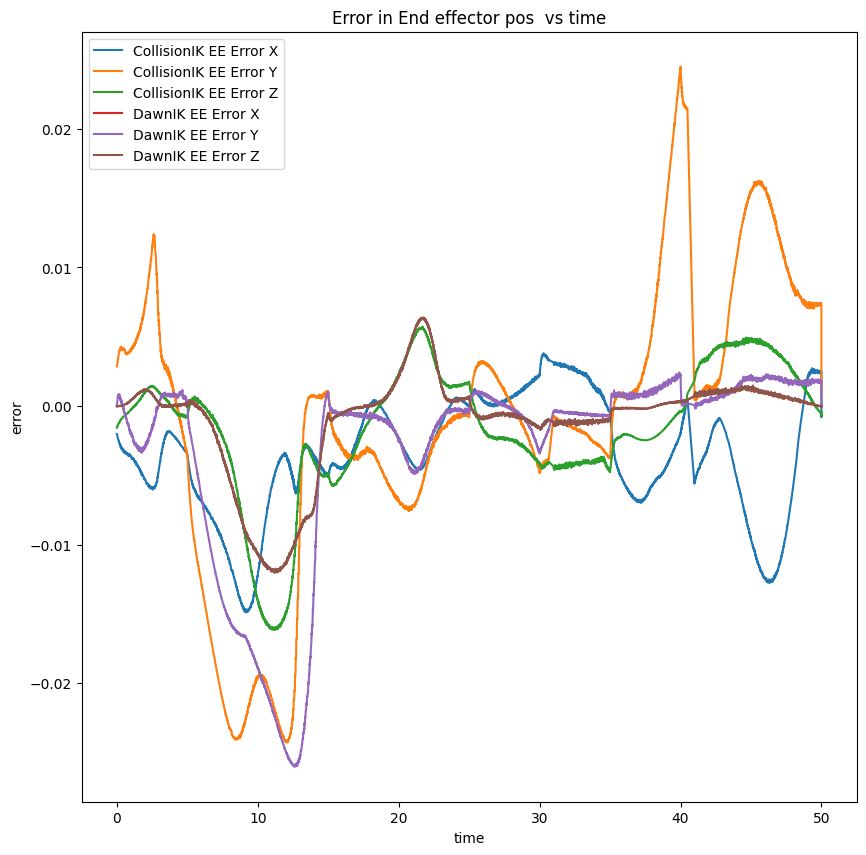

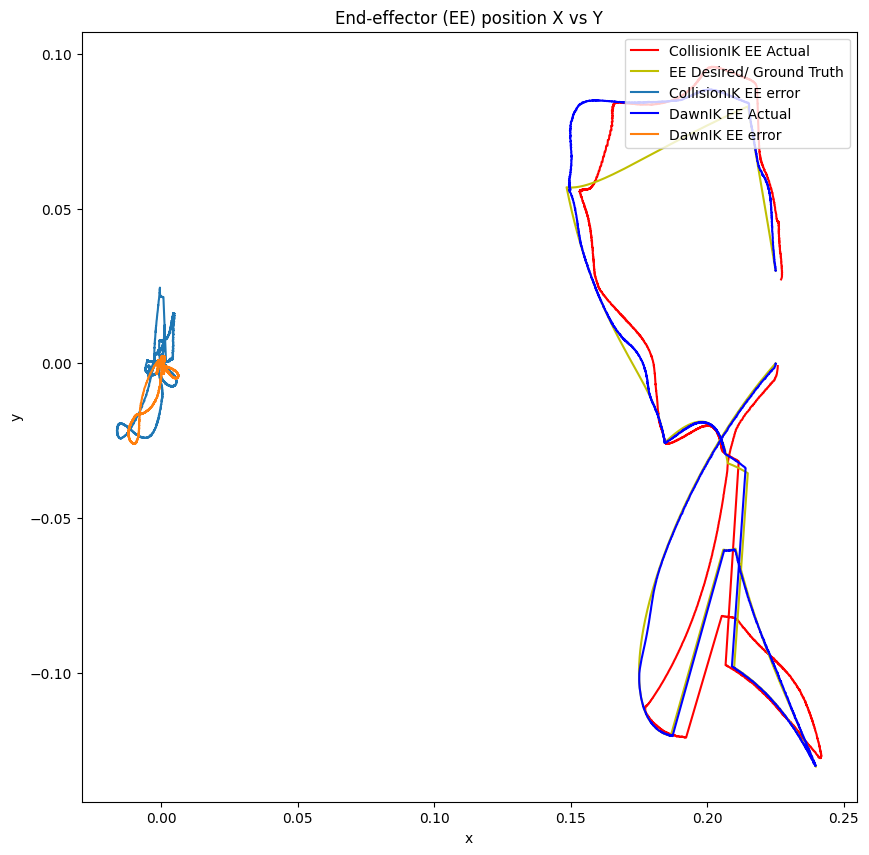

In [98]:

plt.subplots(figsize=(10,10))
plt.title("Error in End effector pos  vs time")
plt.xlabel("time")
plt.ylabel("error")
plt.plot(coll_t, coll_err_x_mean, label="CollisionIK EE Error X")
plt.plot(coll_t, coll_err_y_mean, label="CollisionIK EE Error Y")
plt.plot(coll_t, coll_err_z_mean, label="CollisionIK EE Error Z")

plt.plot(dawn_t, dawn_err_z_mean, label="DawnIK EE Error X")
plt.plot(dawn_t, dawn_err_y_mean, label="DawnIK EE Error Y")
plt.plot(dawn_t, dawn_err_z_mean, label="DawnIK EE Error Z")

plt.legend()
plt.show()



plt.subplots(figsize=(10,10))
plt.title("End-effector (EE) position X vs Y")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(coll_x_mean, coll_y_mean, label="CollisionIK EE Actual", color="r")
plt.plot(coll_xg_mean, coll_yg_mean, label="EE Desired/ Ground Truth",  color="y")
plt.plot(coll_err_z_mean, coll_err_y_mean, label="CollisionIK EE error")
plt.plot(dawn_x_mean, dawn_y_mean, label="DawnIK EE Actual",  color="b")
plt.plot(dawn_err_z_mean, dawn_err_y_mean, label="DawnIK EE error")


plt.legend(loc="upper right")

plt.show()

In [99]:
IKSOLVER_NAME = "collision_ik"
num_collisions = 0
for experiment_file_name  in collisionik_experiments_name:
    #experiment_file_name = IKSOLVER_NAME + PATH_NAME + "-" + str(i)
    for d in collisionik_experiments[experiment_file_name]["data"]:
        num_collisions += int(d["collision_state"])
print("Total collision states:", num_collisions)

Total collision states: 0


In [101]:
IKSOLVER_NAME = "dawn_ik"
num_collisions = 0
for experiment_file_name  in dawnik_experiments_name:
    #experiment_file_name = IKSOLVER_NAME + PATH_NAME + "-" + str(i)
    for d in dawnik_experiments[experiment_file_name]["data"]:
        num_collisions += int(d["collision_state"])
print("Total collision states:", num_collisions)

Total collision states: 0


In [ ]:
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 

for m_type in samples_t.keys():
    fig, ax = plt.subplots(1, figsize=(7,5))
    for i, e_type in enumerate( sorted(samples_t[m_type].keys()) ):
        s = samples_t[m_type][e_type]
        timestamp, test_tra, test_rot, gt_tra, gt_rot = separate_data(s["data"])
        traj_err = np.linalg.norm(test_tra - gt_tra, axis=1)
        ax.plot(timestamp, traj_err, label=e_type)
    ax.set_ylabel("Endpoint translation error")
    ax.set_xlabel("Time [seconds]")
    ax.grid()
    ax.legend()
    fig.suptitle(m_type)
    fig.tight_layout()
    plt.plot()

SyntaxError: invalid syntax (3937367627.py, line 1)